# EXPLORATORY DATA ANALYSIS

# <font color=green>0. IMPORTS</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
import plotly
import plotly.graph_objects as go
import plotly.express as px
import kaleido
import dataframe_image as dfi

In [2]:
### Importing the csv with object detection from ArtNet 
df_objects = pd.read_csv("smk_annotations_artnet_labels_v2.csv")

In [3]:
df_objects.head()

,filename,confidence,label (numeric),label (text),x1,y1,x2,y2
0,KMS8918.png,0.558747,43,window,7.100802,7.360875,1015.96450,713.58620
1,KMS8918.png,0.551458,54,belt,561.199340,289.908420,600.04944,382.23688
2,KMS8918.png,0.545488,19,sun,589.730800,168.722050,696.15700,241.35063
3,KMS8918.png,0.542609,16,lake,7.100802,7.360875,1015.96450,713.58620
4,KMS8918.png,0.520542,113,man,60.169365,248.738500,861.31380,461.10962


# <font color=green>1. ADDING CATEGORIES TO DATAFRAME</font>

In [4]:
# define the Categories dictionary
Categories = {'Christianity': ["Jesus Christ", "God", "Angel", "Virgin Mary", "Saint", "Devil", "Cross"],
              'Occultism': ["Star", "Ghost", "Skull", "Skeleton", "Demon"],
              'Nature': ["Fire", "Sea", "Sky", "Lake", "Cloud", "Lightning", "Sun", "Moon", "Tree", "Flower", "Plant", "Mountain", "Bush", "Rock"],
              'Weaponry': ["Firearm", "Sword", "Bow", "Arrow", "Helmet", "Shield", "Spear", "Armor", "Rope", "Hammer"],
              'Architecture': ["House", "Bridge", "Castle", "Mill", "Church", "Pillar", "Window", "Door", "Staircase"],
              'Clothing': ["Shoes", "Dress", "Hat", "Mask", "Jewellery", "Crown", "Tie", "Umbrella", "Belt", "Cane", "Gloves", "Bag"],
              'Vehicles': ["Car", "Boat", "Ship", "Bicycle", "Train", "Airplane", "Wheel", "Carriage"],
              'Furniture': ["Sofa", "Chair", "Table", "Bed", "Bathtub", "Easel"],
              'Interior': ["Lamp", "Vase", "Book", "Mirror", "Drapery", "Bird cage", "Paper", "Globe", "Cup", "Flag", "Bottle", "Bowl"],
              'Food': ["Banana", "Orange", "Melon", "Apple", "Grapes", "Wine", "Lobster", "Vegetable", "Bread", "Cheese", "Pineapple"],
              'Animals': ["Bird", "Reptile", "Fish", "Rabbit", "Horse", "Cat", "Donkey", "Dog", "Chicken", "Cow", "Mouse", "Sheep", "Insect", "Butterfly"],
              'Human': ["Child", "Baby", "Face", "Hand", "Man", "Woman"],
              'Instrument': ["Harp", "Violin", "Flute", "Piano", "Drum", "Guitar"]}

In [5]:
# Converting the categories dictionary to a pandas Series
series = pd.Series(Categories)

# Count the number of values for each key
value_counts = series.apply(lambda x: len(x))

# Print the value count
print("Labels for each category:")
print(value_counts, "\n")

# Sum the total number of values
total_sum = series.apply(lambda x: len(x)).sum()

# Print the total number of values in the dictionary
print("Total number of labels in the dictionary:")
print(total_sum)

Labels for each category:
Christianity     7
Occultism        5
Nature          14
Weaponry        10
Architecture     9
Clothing        12
Vehicles         8
Furniture        6
Interior        12
Food            11
Animals         14
Human            6
Instrument       6
dtype: int64 

Total number of labels in the dictionary:
120


In [6]:
# create a dictionary to map object labels to categories
label_to_category = {}
for category, labels in Categories.items():
    for label in labels:
        label_to_category[label.lower()] = category

# create category column and map object labels to categories
df_objects['category'] = df_objects['label (text)'].map(label_to_category)

# <font color=green>2. EXPLORATORY DATA ANALYSIS </font>

In [7]:
### Exploring the shape of the dataframe 
total_objects = len(df_objects.index) 
print ("Total number of objects found: ", total_objects, "\n")

### Exploring the total amount of labels that have been detected 
total_labels = df_objects["label (text)"].nunique()
print ("Total number of labels that have been detected: ", total_labels, "\n")

### Exploring the number of categories that are represented in the dataset
total_categories = df_objects["category"].nunique()
print("Total number of categories represented: ", total_categories, "\n")

## Label with the lowest number of detected objects 
min_detected_objects = df_objects['label (text)'].value_counts().min()
print("Label with the lowest number of detected labels: ", min_detected_objects, "\n")

## Label with the highest number of detected objects 
max_detected_objects = df_objects['label (text)'].value_counts().max()
print("Label with the highest number of detected labels: ", max_detected_objects, "\n")

## Unique paintings in the object detection 
unqique_paintings = df_objects['filename'].nunique()
print("Number of unique paintings in the object detection: ", unqique_paintings, "\n")

Total number of objects found:  109145 

Total number of labels that have been detected:  120 

Total number of categories represented:  13 

Label with the lowest number of detected labels:  5 

Label with the highest number of detected labels:  5975 

Number of unique paintings in the object detection:  6477 



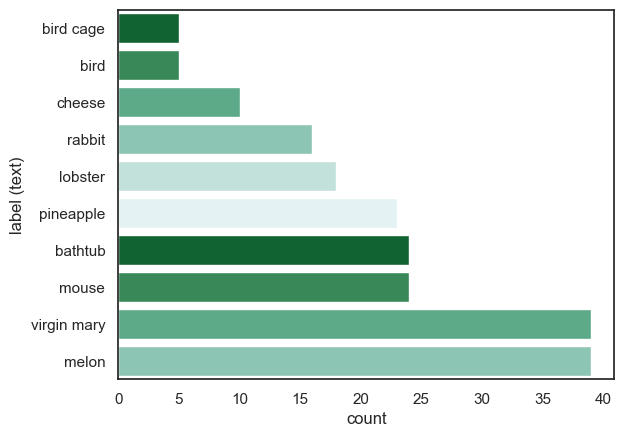

In [11]:
# Setting figure size and axes
palette_lowest = sns.color_palette('BuGn_r')
palette_highest= sns.color_palette('PuBu_r')
sns.set_theme(style='white')
sns.countplot(y="label (text)",data=df_objects, palette=palette_lowest, order=df_objects['label (text)'].value_counts(ascending=True).iloc[:10].index)
#save fig
plt.savefig("lowest.jpg")

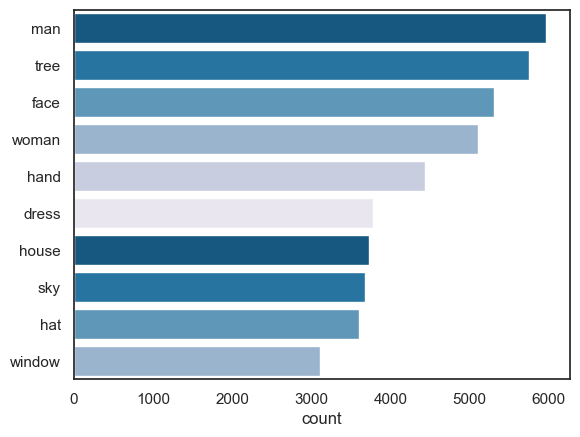

In [12]:
# Setting figure size and axes
palette_lowest = sns.color_palette('BuGn_r')
palette_highest= sns.color_palette('PuBu_r')
sns.set_theme(style='white')
sns.countplot(y=df_objects["label (text)"].values,palette=palette_highest,data=df_objects, order=df_objects['label (text)'].value_counts(ascending=False).iloc[:10].index)
#save fig
plt.savefig("highest.jpg")

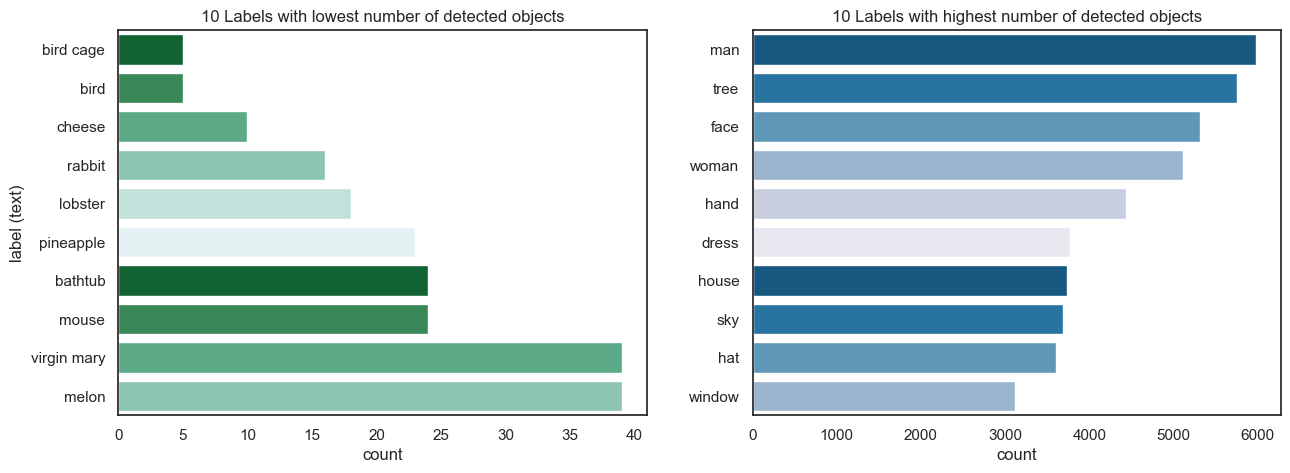

In [13]:
# Setting figure size and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
palette_lowest = sns.color_palette('BuGn_r')
palette_highest= sns.color_palette('PuBu_r')
sns.set_theme(style='white')

# Setting subplots
sns.countplot(ax=axes[0],y="label (text)",data=df_objects, palette=palette_lowest, order=df_objects['label (text)'].value_counts(ascending=True).iloc[:10].index)
sns.countplot(ax=axes[1],y=df_objects["label (text)"].values,palette=palette_highest,data=df_objects, order=df_objects['label (text)'].value_counts(ascending=False).iloc[:10].index)

#sns.barplot(ax=axes[0], x=bulbasaur.index, y=bulbasaur.values)
axes[0].set_title("10 Labels with lowest number of detected objects")
axes[1].set_title("10 Labels with highest number of detected objects")

#save fig
plt.savefig("highest_and_lowest.svg")

In [ ]:
df = df_objects
color_sequence=['#090609', '#241a26', '#402e43', '#5b4260', '#77567d', '#8e6696', '#926b99', '#a788ad', '#bca5c1', '#d2c2d5','#e0d5e2', '#e7dfe9', '#f9f7fa']
#color_discrete_sequence=["orange", "red", "green", "blue", "purple"],
fig = px.pie(df_objects, values=df_objects['category'].value_counts(),color= df_objects['category'].unique(), color_discrete_sequence=color_sequence,names= df_objects['category'].unique(), hole = 0.4)
fig.update_traces(textposition='outside', textinfo='percent+label')
#save fig
fig.show()

#### <font color='#1260CC'> 2.1 Creating dataframe based on unique labels </font>

In [ ]:
# Group by 'object_labels' and calculate mean of 'confidence'
confidence_mean = df_objects.groupby('label (text)')['confidence'].mean()

# Count occurrences of 'object_labels'
label_count = df_objects['label (text)'].value_counts()

# Create new dataframe with columns: labels, label_count, confidence_mean
df_labels = pd.DataFrame({'labels': confidence_mean.index})
df_labels['confidence_mean'] = df_labels['labels'].map(confidence_mean)
df_labels['label_count'] = df_labels['labels'].map(label_count)

# map object labels to categories
df_labels['category'] = df_labels['labels'].map(label_to_category)

In [ ]:
## Generate descriptive statistics for the dataframe df_labels
df_labels.describe().round(2)

In [ ]:
# Printing the mean confidence level, value count and category per label
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_labels.sort_values(by=['label_count'], ascending=False))

In [ ]:
# plotting correlation heatmap focusing on mean confidence per label and value count per label
dataplot = sns.heatmap(df_labels.corr(), cmap="YlGnBu", annot=True)

In [ ]:
## Plotting the relation between mean_confidence level and the value count per label
df = df_labels
fig = px.scatter(df, x="label_count", y="confidence_mean", color='labels')
fig.show()

In [ ]:
#Plotting the distraibution og detected objects per label, grouped by category 
df = df_objects

xaxis_title = "Label count"
yaxis_title = "Categories"

fig = px.histogram(df, y="label (text)", color="category", text_auto = True,  color_discrete_sequence=px.colors.qualitative.Alphabet, width=1000, height=2000, labels={
                     "label (text)": "Labels",
                     "category": "Categories",
                     "count": "Count"
                 },)
fig.update_layout(title_text='Object count per label grouped by category', plot_bgcolor="white", xaxis2= {'anchor': 'y', 'overlaying': 'x', 'side': 'top'}, legend={'traceorder':'reversed'})
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='lightgrey', gridwidth=0.5, mirror="allticks", side="bottom")
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='lightgrey', gridwidth=0.1)
fig.update_traces(textposition='outside')
fig.show()


#### <font color='#1260CC'> 2.2 Exploring the confidence level

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 10))
 
palette = sns.color_palette('PuBu_r')
sns.set_theme(style='white')

# drawing the plot
sns.histplot(data=df_objects, x="confidence", color='#EE8D24',  ax=ax, edgecolor="#E26310", linewidth=2)

#save fig
plt.savefig("confidence_level.jpg")
plt.show()

In [ ]:
# define the intervals
intervals = [0.5, 0.6, 0.7, 0.8, 0.9]

# create a dictionary to store the counts for each interval
counts = {}
for interval in intervals:
    counts[interval] = 0

# count the number of rows for each interval
for value in df_objects['confidence']:
    for interval in intervals:
        if value >= interval:
            counts[interval] += 1

# print the dictionary of counts
print(counts)

In [ ]:
df_filtered_by_condidence = df_objects[df_objects['confidence'] >= 0.6 ]

In [ ]:
## Investigating the distribution of objects with confidence >= 0.6
df = df_filtered_by_condidence

xaxis_title = "Label count"
yaxis_title = "Categories"

fig = px.histogram(df, x="category", color="label (text)", color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_layout(title_text='Distribution of Labels Grouped by Category [Confidence >= 0.6]', plot_bgcolor="white")
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='lightgrey', gridwidth=0.5)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='lightgrey', gridwidth=0.1)
fig.show()

##fig.write_html("/category_graph.html")
#plotly.offline.plot(fig, filename='filtered_by_confidence_category_graph.html') 